## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [2]:
# Set the working directory
import os
os.chdir("/Users/skywalker/Downloads")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")

#### 1. Summaries and Aggregates

In [2]:
#A. The describe() method
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
cars[["MPG","Weight"]].describe()

,MPG,Weight
count,406.000000,406.000000
mean,23.051232,2979.413793
std,8.401777,847.004328
min,0.000000,1613.000000
25%,17.000000,2226.500000
50%,22.350000,2822.500000
75%,29.000000,3618.250000
max,46.600000,5140.000000


In [5]:
#A. Aggregates - groupby() method
cars["Weight"].mean()

2979.4137931034484

In [9]:
cars[["Weight","Origin"]].groupby(["Origin"]).mean()

,Weight
Origin,
Europe,2431.493151
Japan,2221.227848
US,3372.700787


In [11]:
cars.groupby(["Origin"]).mean()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
Origin,,,,,,,
Europe,26.745205,4.150685,109.465753,78.780822,2431.493151,16.821918,75.739726
Japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
US,19.688189,6.283465,247.935039,118.011811,3372.700787,14.942520,75.500000


In [14]:
cars.groupby(["Origin"]).describe()

Acceleration                                                      \
              count       mean       std   min   25%   50%    75%   max   
Origin                                                                    
Europe         73.0  16.821918  3.010917  12.2  14.5  15.7  19.00  24.8   
Japan          79.0  16.172152  1.954937  11.4  14.6  16.4  17.55  21.0   
US            254.0  14.942520  2.804542   8.0  13.0  15.0  16.70  22.2   

       Cylinders             ...   Model       Weight               \
           count      mean   ...     75%   max  count         mean   
Origin                       ...                                     
Europe      73.0  4.150685   ...    79.0  82.0   73.0  2431.493151   
Japan       79.0  4.101266   ...    81.0  82.0   79.0  2221.227848   
US         254.0  6.283465   ...    78.0  82.0  254.0  3372.700787   

                                                              
               std     min      25%     50%      75%     max  
Origin                                                        
Europe  490.883617  1825.0  2065.00  2246.0  2800.00  3820.0  
Japan   320.497248  1613.0  1985.00  2155.0  2412.50  2930.0  
US      791.695866  1800.0  2721.25  3380.5  4054.75  5140.0  

[3 rows x 56 columns]

#### 2. Tables (Crosstabs)

In [17]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab=pd.crosstab(cars.Origin, columns="counts")
tab

col_0,counts
Origin,
Europe,73
Japan,79
US,254


In [18]:
#B. Univariate table of proportion
tab/tab.sum()*100

col_0,counts
Origin,
Europe,17.980296
Japan,19.458128
US,62.561576


In [19]:
#B. Univariate table of proportion
round(tab/tab.sum()*100)

col_0,counts
Origin,
Europe,18.0
Japan,19.0
US,63.0


In [21]:
#C. Bi-variate Frequency Distribution Table
pd.crosstab(cars.Origin,columns=cars.Cylinders)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [22]:
#Re-Naming the Rows and Columns
table=pd.crosstab(cars.Origin,columns=cars.Cylinders)
table.columns = ["Cy3","Cy4","Cy5","Cy6","Cy8"]
table.index = ["EU","JP","US"]
table

,Cy3,Cy4,Cy5,Cy6,Cy8
EU,0,66,3,4,0
JP,4,69,0,6,0
US,0,72,0,74,108


In [23]:
#Finding the col-sums
coltotal=table.sum(axis=0)
coltotal

Cy3      4
Cy4    207
Cy5      3
Cy6     84
Cy8    108
dtype: int64

In [24]:
#Finding the row sums
rowtotal=table.sum(axis=1)
rowtotal

EU     73
JP     79
US    254
dtype: int64

In [26]:
#D. Table od joint proportion
round(table/sum(rowtotal),2)*100 #2 defines the number of didgits after decimal

,Cy3,Cy4,Cy5,Cy6,Cy8
EU,0.0,16.0,1.0,1.0,0.0
JP,1.0,17.0,0.0,1.0,0.0
US,0.0,18.0,0.0,18.0,27.0


In [ ]:
#OR we can use column total instead of row total


In [27]:
#E. Table of conditional proportion (Conditioned on rows)
table.div(rowtotal,axis=0)

,Cy3,Cy4,Cy5,Cy6,Cy8
EU,0.000000,0.904110,0.041096,0.054795,0.000000
JP,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


In [28]:
#F. Table of conditional proportion (conditioned on columns)
table.div(coltotal, axis=1)

,Cy3,Cy4,Cy5,Cy6,Cy8
EU,0.0,0.318841,1.0,0.047619,0.0
JP,1.0,0.333333,0.0,0.071429,0.0
US,0.0,0.347826,0.0,0.880952,1.0


#### 3. Graphs

In [5]:
import matplotlib.pyplot as plt

#### 3A. Histograms

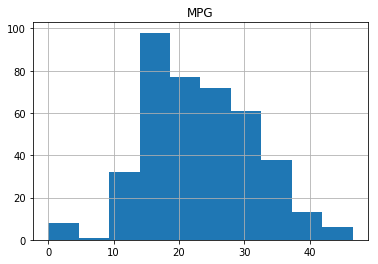

In [30]:
#histogram of MPG
cars.hist(column="MPG")
plt.show()

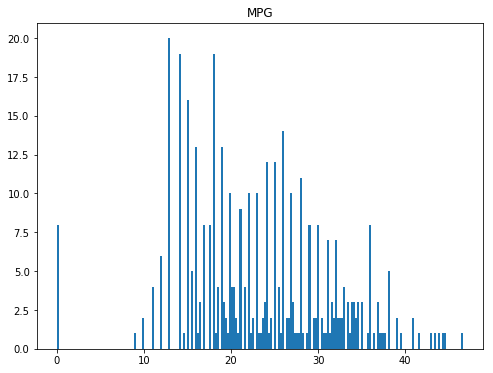

In [34]:
#Additional arguments: 
cars.hist(column="MPG",
          grid=False,
          figsize = (8,6),
         bins=200)
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

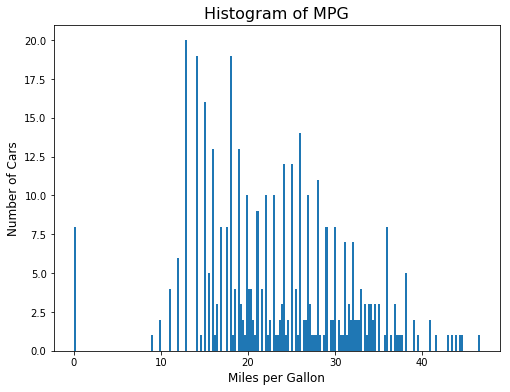

In [38]:
#Labelling the axes and giving the title
cars.hist(column="MPG",
          grid=False,
          figsize = (8,6),
         bins=200)
plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)
plt.show()


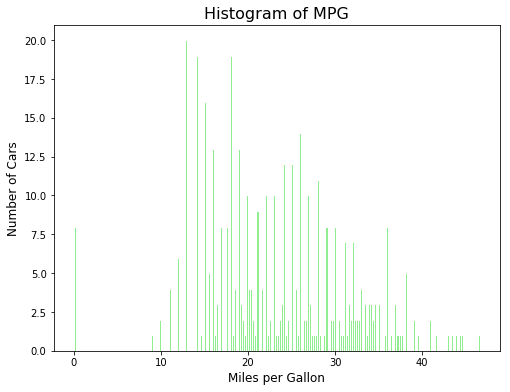

In [39]:
#Editing color and edgecolor
cars.hist(column="MPG",
          grid=False,
          figsize = (8,6),
         bins=200,
         color = "lightgreen",
         edgecolor = "white")
plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)
plt.show()


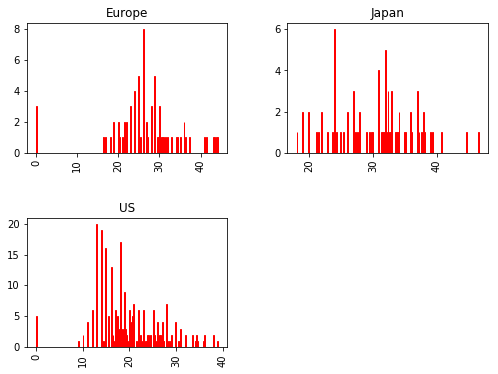

In [42]:
#Breaking up by the categories of a categorical variable
cars.hist(column="MPG",
          by = "Origin",
          grid=False,
          figsize = (8,6),
         bins=200,
         color = "lightgreen",
         edgecolor = "red")
plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)
plt.show()





#### 3B. Boxplots

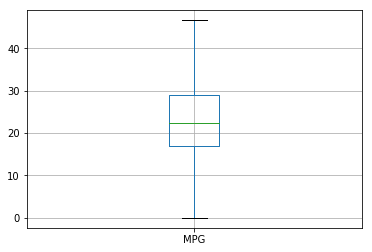

In [43]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column= "MPG")
plt.show()

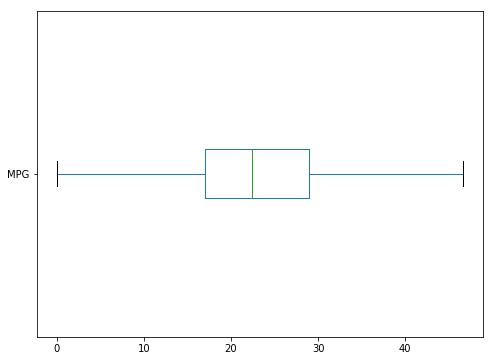

In [44]:
#Additional arguments (horizontal boxplot)
cars.boxplot(column= "MPG",
            grid=False,
            figsize = (8,6),
            vert = False)
plt.show()


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

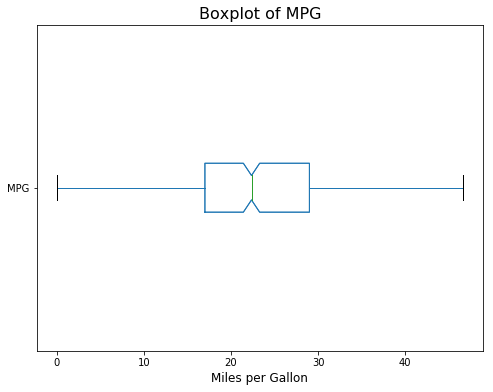

In [46]:
#Labelling the boxplot
cars.boxplot(column= "MPG",
             notch = True,
            grid=False,
            figsize = (8,6),
            vert = False)
plt.xlabel("Miles per Gallon", fontsize=12)
plt.title("Boxplot of MPG", fontsize=16)
plt.show()


/Users/skywalker/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


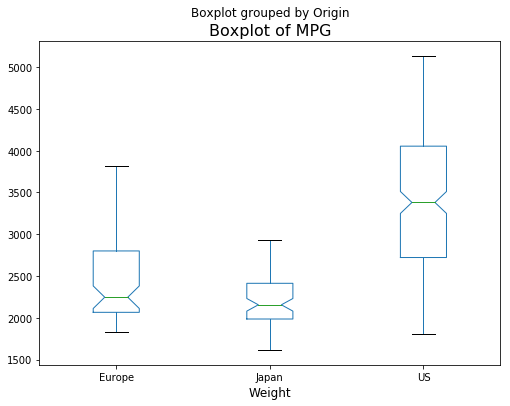

In [49]:
#Side by Side boxplot
cars.boxplot(column= "Weight",
             by = "Origin",
             notch = True,
            grid=False,
            figsize = (8,6),
            vert = True)
plt.xlabel("Weight", fontsize=12)
plt.title("Boxplot of MPG", fontsize=16)
plt.show()




/Users/skywalker/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


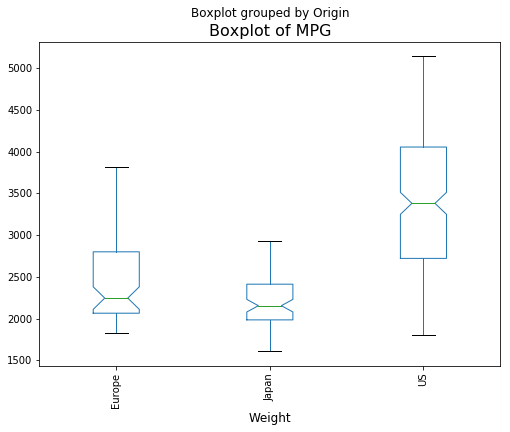

In [50]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column= "Weight",
             by = "Origin",
             notch = True,
            grid=False,
            figsize = (8,6),
            vert = True,
            rot = 90)
plt.xlabel("Weight", fontsize=12)
plt.title("Boxplot of MPG", fontsize=16)
plt.show()


#### 3C. Bar Plots

In [3]:
cars['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [9]:
type(cars['Origin'].value_counts())  #notice series

pandas.core.series.Series

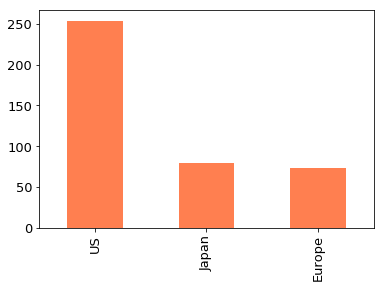

In [8]:
cars['Origin'].value_counts().plot(kind='bar', figsize=(6,4), color="coral", fontsize=13)
plt.show()  #by using barh in place of bar we get horizontal bars

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

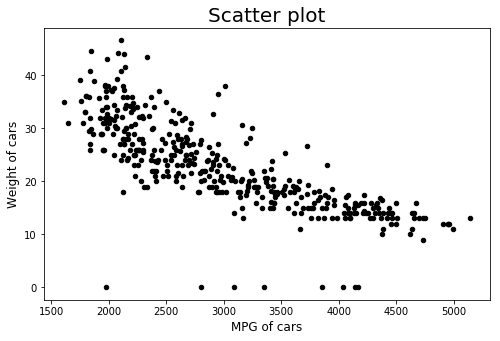

In [10]:
#Scatter plot 
cars.plot(kind="scatter",
         x="Weight", y="MPG",
         color="black",
         figsize=(8,5))
plt.xlabel("MPG of cars", fontsize=12)
plt.ylabel("Weight of cars", fontsize=12)
plt.title("Scatter plot", fontsize=20)
plt.show()
# 

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


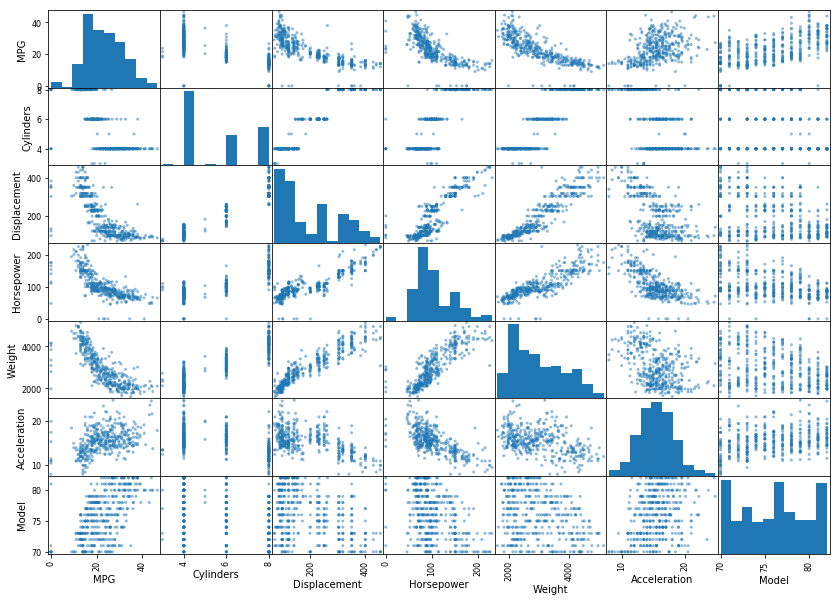

In [11]:
#Pairwise Scatterplot
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"], axis=1), alpha=0.5, figsize=(14,10), diagonal='hist')
plt.show()

In [12]:
#Exporting Graph
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"], axis=1), alpha=0.5, figsize=(14,10), diagonal='hist')
plt.savefig('scatter.png')


/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Part 2 - Data Manipulation

#### 1. Sorting

In [15]:
#Sort the data in ascending order of MPG
cars.sort_values("MPG").head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe


In [20]:
#Sort the data in descending order of MPG
cars.sort_values("Origin", ascending=0).head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
209,AMC Pacer d/l,17.5,6,258.0,95,3193,17.8,76,US
235,Ford Grenada,18.5,6,250.0,98,3525,19.0,77,US
234,Plymouth Volare Custom,19.0,6,225.0,100,3630,17.7,77,US
233,Buick Skylark,20.5,6,231.0,105,3425,16.9,77,US


In [21]:
#Sort the data in descending order of Origin and then by increasing order of MPG
cars.sort_values(["Origin","MPG"], ascending=[0,1]).head() #remove head to get a clearer view

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US


In [35]:
#Saving in another data frame
cars2 = cars.sort_values("Origin", ascending=0)
cars2.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,Low
209,AMC Pacer d/l,17.5,6,258.0,95,3193,17.8,76,US,Low
235,Ford Grenada,18.5,6,250.0,98,3525,19.0,77,US,Low
234,Plymouth Volare Custom,19.0,6,225.0,100,3630,17.7,77,US,Low
233,Buick Skylark,20.5,6,231.0,105,3425,16.9,77,US,Low


#### 2. Variable Transformation

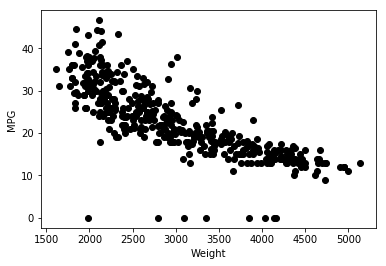

In [24]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.
plt.scatter(cars.Weight, y=cars.MPG, color="black")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


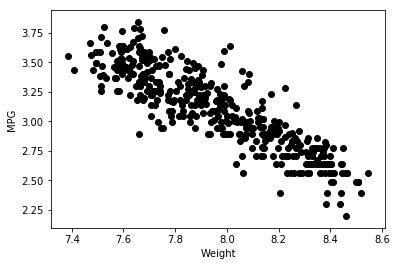

In [26]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
import numpy as np
plt.scatter(np.log(cars.Weight), y=np.log(cars.MPG), color="black")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

In [27]:
# But there is a problem! Check the summary of log(MPG). What do you observe?
np.log(cars.MPG).describe() #for zero its -ve infinity therefore we could add 1 to the values. 

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


count    406.000000
mean           -inf
std             NaN
min            -inf
25%        2.833213
50%        3.106824
75%        3.367296
max        3.841601
Name: MPG, dtype: float64

In [28]:
np.log(cars.MPG+1).describe()

count    406.000000
mean       3.085804
std        0.543030
min        0.000000
25%        2.890372
50%        3.150595
75%        3.401197
max        3.862833
Name: MPG, dtype: float64

In [ ]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?


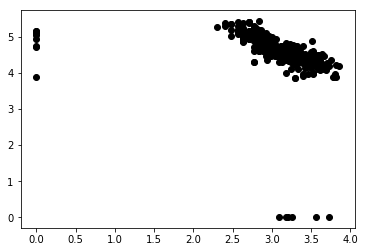

In [30]:
# Study the association between MPG and Horsepower. (Do Yourself)
plt.scatter(np.log(cars.MPG+1), y=np.log(cars.Horsepower+1), color='black')
plt.show()


#### The np.where() function


In [31]:
import numpy as np

In [34]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"
cars["HP"]= np.where(cars.Horsepower>140, "High", "Low")
cars.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,Low
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,High
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,High
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,High
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,Low


In [47]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"
cars["MPG_Rate"]= np.where(cars.MPG<15, "Normal", np.where(cars.MPG<=25, "Good", np.where(cars.MPG<=35, "Great", np.where(cars.MPG>=35, "Awesome", "shit")))) 
cars.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP,MPG_Rate
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,Low,Good
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,High,Good
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,High,Good
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,High,Good
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,Low,Good


In [48]:
from ggplot import *

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/skywalker/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/skywalker/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


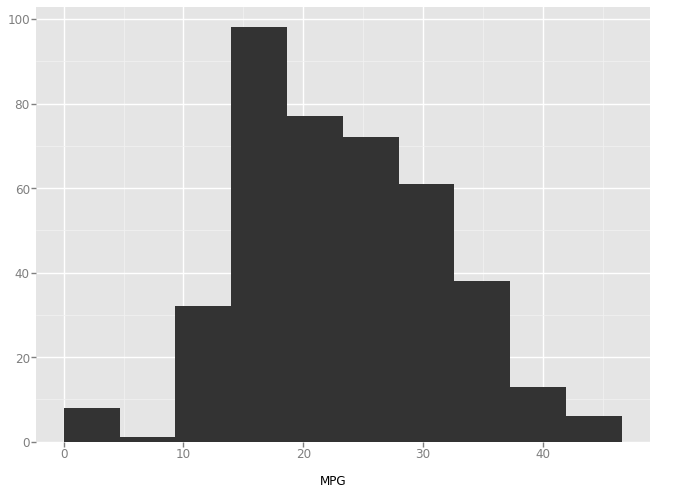

<ggplot: (-9223372036569777355)>

In [50]:
ggplot(aes(x="MPG"), data=cars) + geom_histogram()

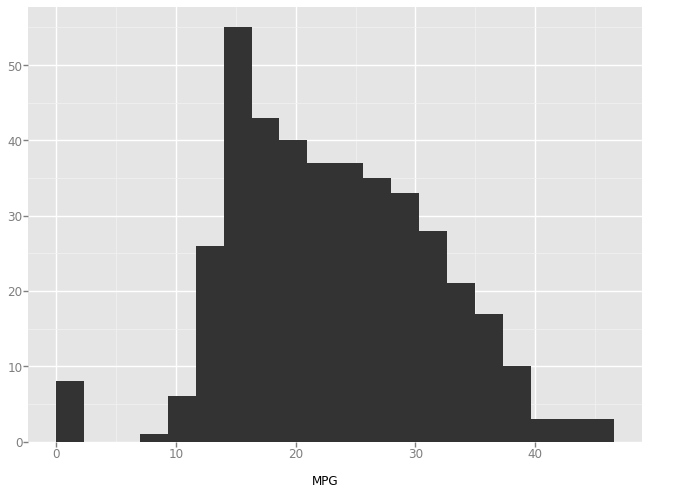

<ggplot: (-9223372036569921883)>

In [52]:
ggplot(aes(x="MPG"), data=cars) + geom_histogram(bins=20)

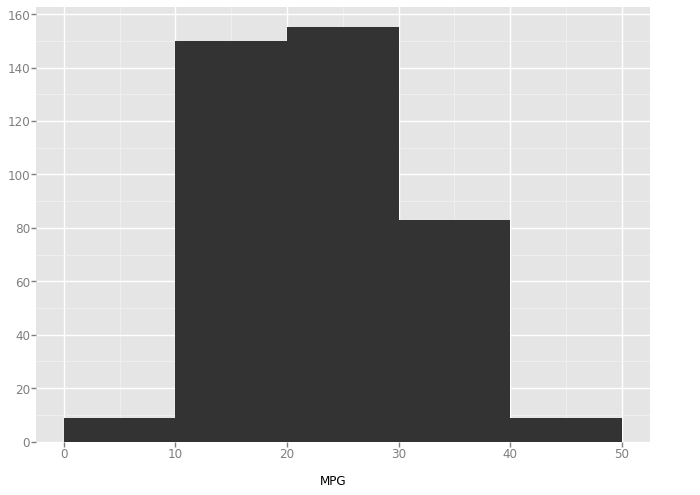

<ggplot: (-9223372036568556256)>

In [53]:
ggplot(aes(x="MPG"), data=cars) + geom_histogram(binwidth=10)

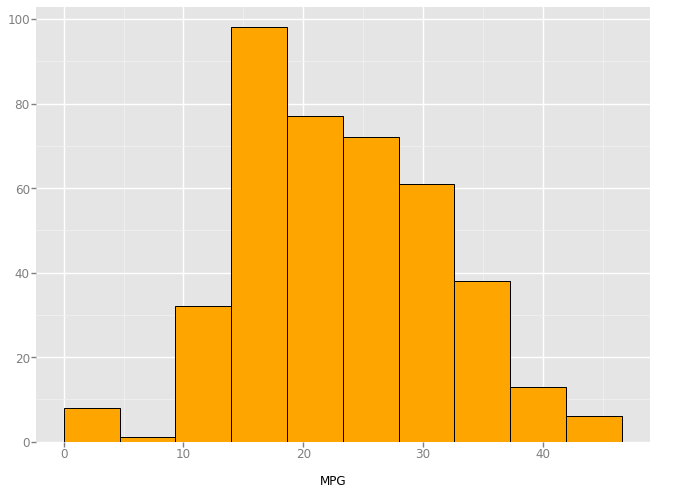

<ggplot: (-9223372036570013110)>

In [55]:
ggplot(aes(x="MPG"), data=cars) + geom_histogram(fill='orange', color='black')

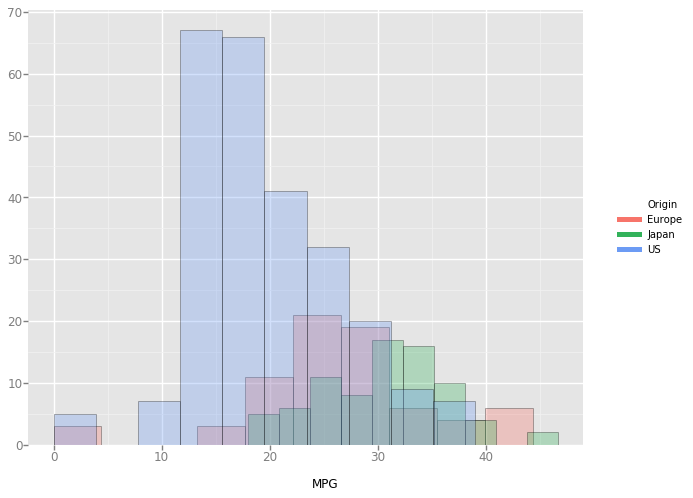

<ggplot: (284794667)>

In [56]:
ggplot(aes(x="MPG", fill="Origin"), data=cars) + geom_histogram(color='black', alpha=0.3)

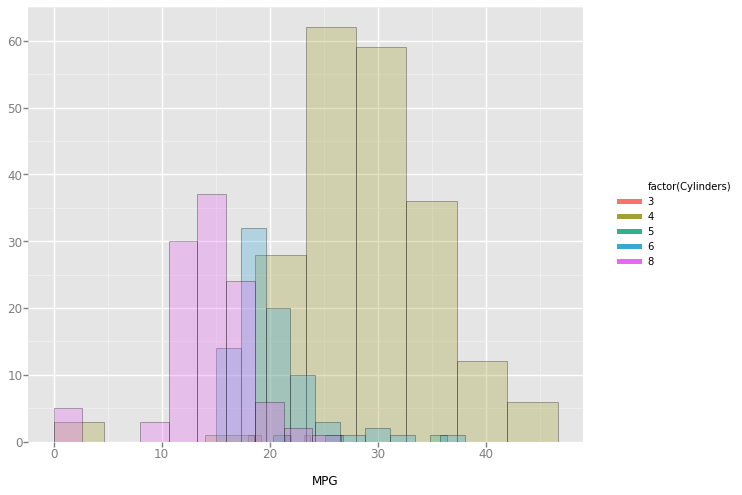

<ggplot: (-9223372036570085274)>

In [60]:
ggplot(aes(x="MPG", fill='factor(Cylinders)'), data=cars) + geom_histogram(color='black', alpha=0.3)

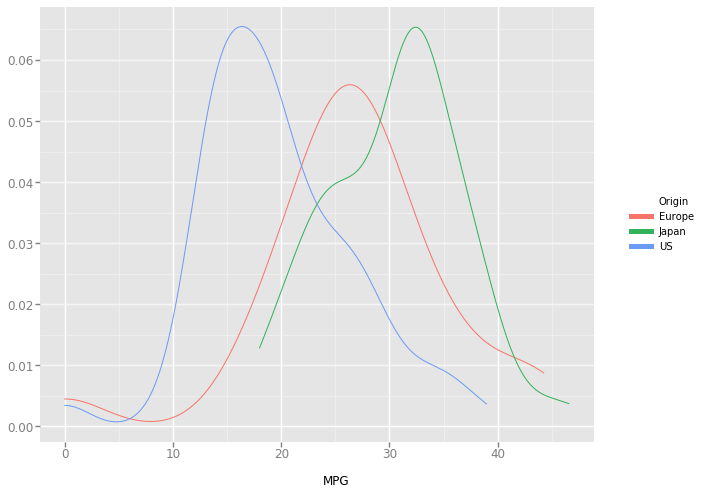

<ggplot: (286160725)>

In [63]:
ggplot(aes(x="MPG", color="Origin"), data=cars) + geom_density()

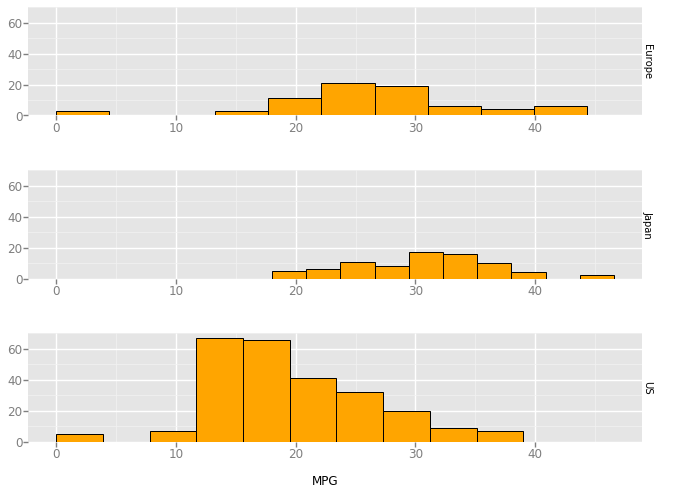

<ggplot: (7536292907)>

In [64]:
p = ggplot(aes(x="MPG"), data=cars) + geom_histogram(fill='orange', color='black')
p + facet_grid("Origin")

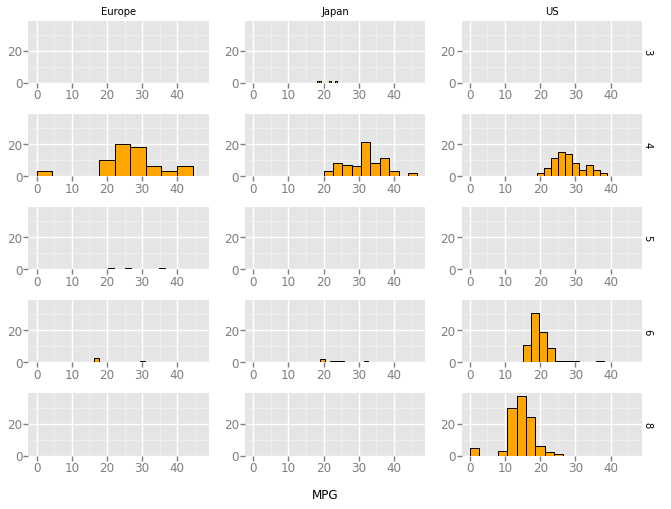

<ggplot: (286155198)>

In [67]:
p = ggplot(aes(x="MPG"), data=cars) + geom_histogram(fill='orange', color='black')
p + facet_grid('Cylinders','Origin')

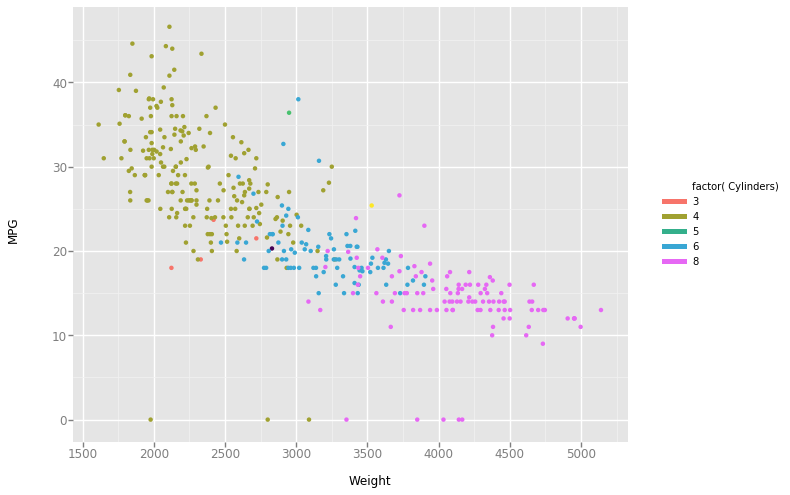

<ggplot: (-9223372029315859214)>

In [75]:
ggplot(aes('Weight','MPG', color='factor( Cylinders)'), data=cars) + geom_point(size=20)

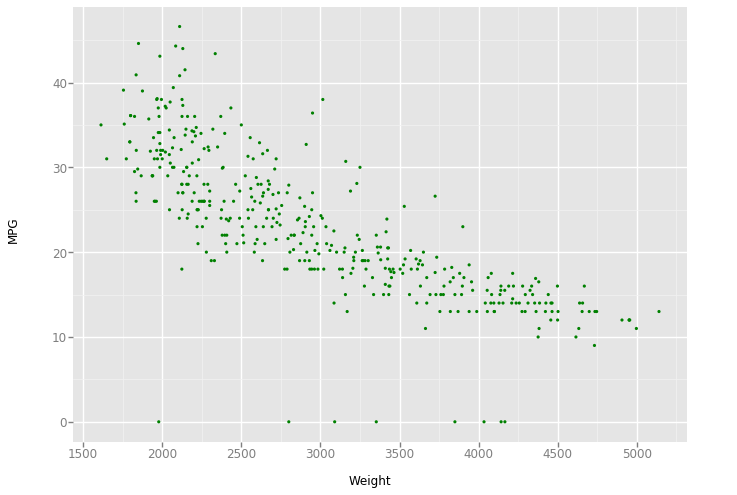

<ggplot: (7538901817)>

In [74]:
ggplot(aes('Weight','MPG'), data=cars) + geom_point(size=10, color='green')

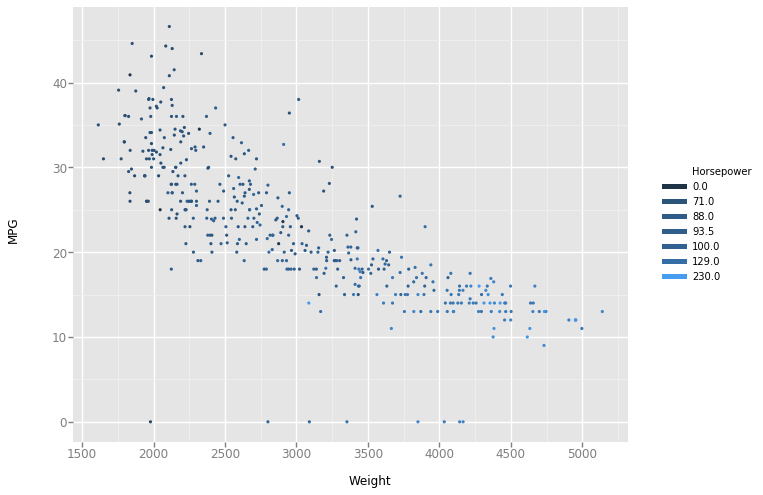

<ggplot: (-9223372029315616466)>

In [76]:
ggplot(aes('Weight','MPG', color='Horsepower'), data=cars) + geom_point(size=10)

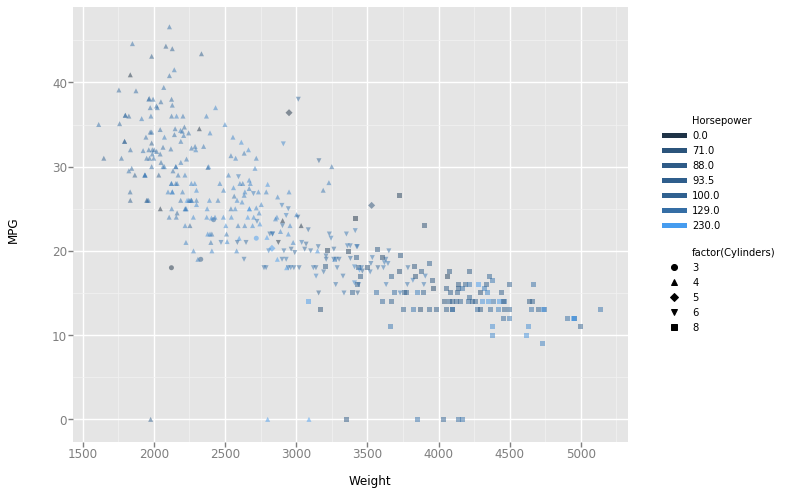

<ggplot: (-9223372029315059831)>

In [80]:
ggplot(aes('Weight','MPG', color='Horsepower', shape='factor(Cylinders)'), data=cars) + geom_point(size=25, alpha=0.5)

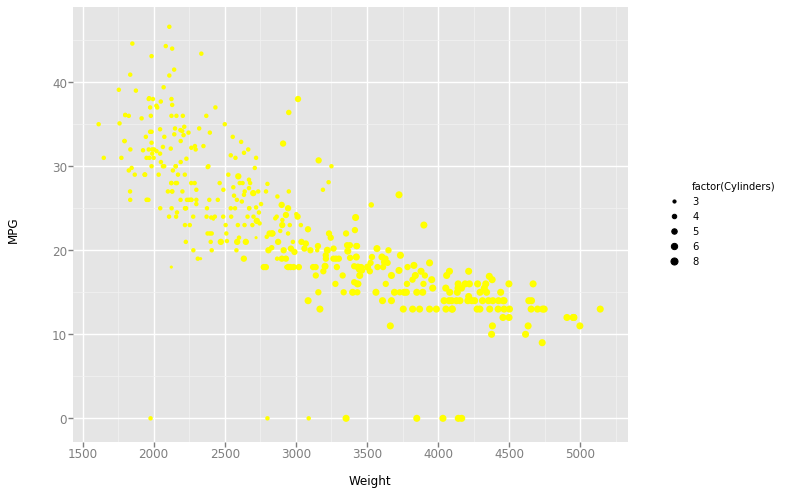

<ggplot: (7540969778)>

In [88]:
ggplot(aes('Weight','MPG', size='factor(Cylinders)'), data=cars) + geom_point(color='yellow') #no size in geom